In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random, time
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, MDS, Isomap

Let's load in the data to a panda DataFrame. A sample of the data is often better here so the routines run faster.

In [3]:
import pandas as pd

activity_file = 'encode_roadmap_act.txt'
# activity_file = 'encode_roadmap_acc_50k.txt'

activity_df = pd.read_table(activity_file, index_col=0)

(164, 2021886)


First, let's ask some sequence-centric questions. If we compute the proportion of active targets for each sequence, what does the distribution of this stat look like?

0.0382261907941


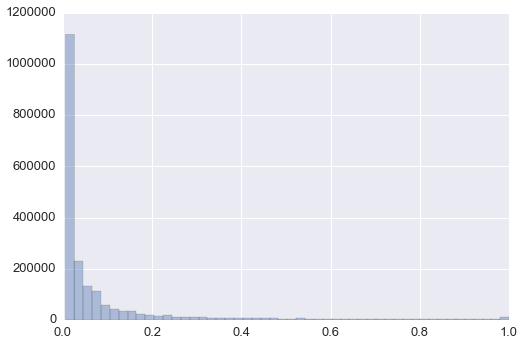

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

seq_activity = activity_df.mean(axis=1)

constitutive_pct = sum(seq_activity > 0.5) / float(seq_activity.shape[0])
print '%.4f constitutively active sequences' % constitutive_pct

sns.distplot(seq_activity, kde=False)

0.0412125114868 0.189763418907
0.0817271596915


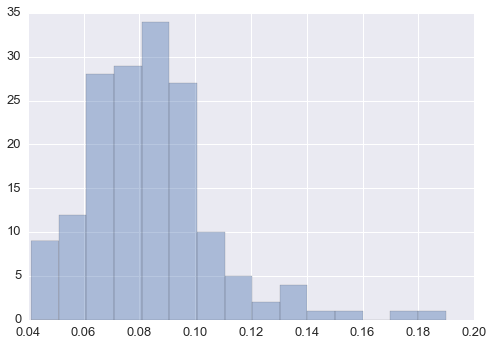

In [5]:
cell_activity = df.mean(axis=0)

ca_out = open('cell_activity.txt', 'w')
for ci in range(len(cell_activity)):
    cols = (str(ci), df.columns[ci], str(cell_activity[ci]))
    print >> ca_out, '\t'.join(cols)
ca_out.close()

print cell_activity.min(), cell_activity.max()
print cell_activity.median()

sns.distplot(cell_activity, kde=False)

In [36]:
# construct matrix
X = np.array(df).T

print X.shape

# dimensionality reduction
model = Isomap(n_components=2, n_neighbors=10)
X_dr = model.fit_transform(X)

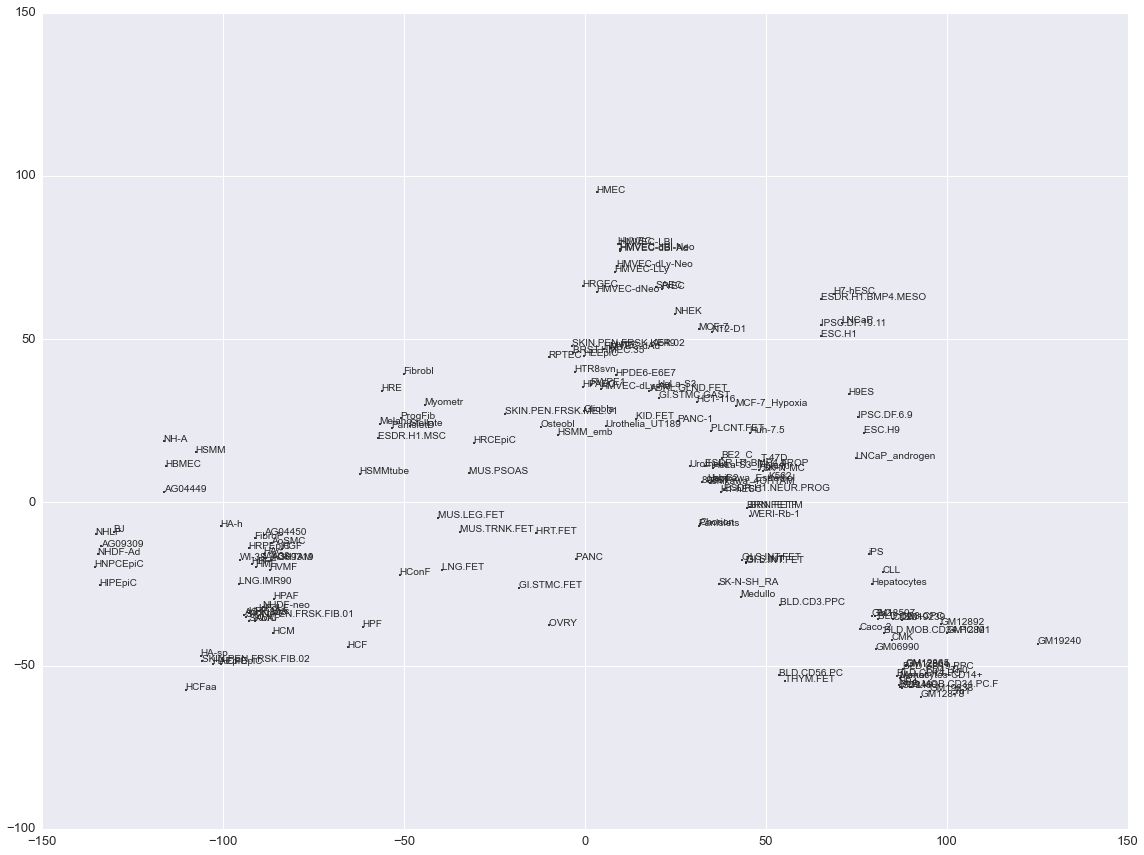

In [37]:
# plot PCA
plt.figure(figsize=(16,12), dpi=100)
plt.scatter(X_dr[:,0], X_dr[:,1], c='black', s=3)
#plt.ylim(-10,15)
#plt.xlim(-14,15)

for label, x, y in zip(df.columns, X_dr[:,0], X_dr[:,1]):
    plt.annotate(label, xy=(x,y), size=10)
    
plt.tight_layout()
plt.savefig('pca.pdf')

In [38]:
# Isomap dimensionality reduction
model = Isomap(n_components=2, n_neighbors=5)
X_dr = model.fit_transform(X)

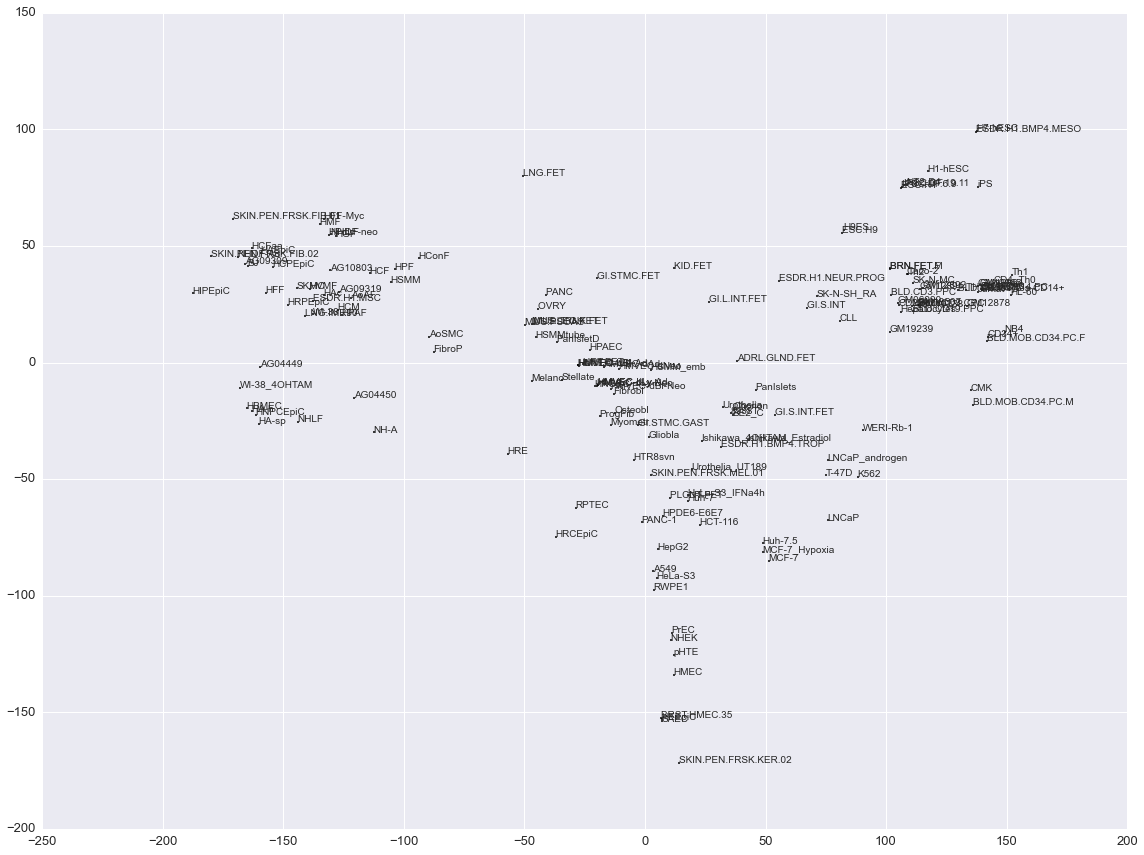

In [39]:
# plot
plt.figure(figsize=(16,12), dpi=100)
plt.scatter(X_dr[:,0], X_dr[:,1], c='black', s=3)
#plt.ylim(-10,15)
#plt.xlim(-14,15)

for label, x, y in zip(df.columns, X_dr[:,0], X_dr[:,1]):
    plt.annotate(label, xy=(x,y), size=10)
    
plt.tight_layout()
plt.savefig('isomap.pdf')

Takes 175s


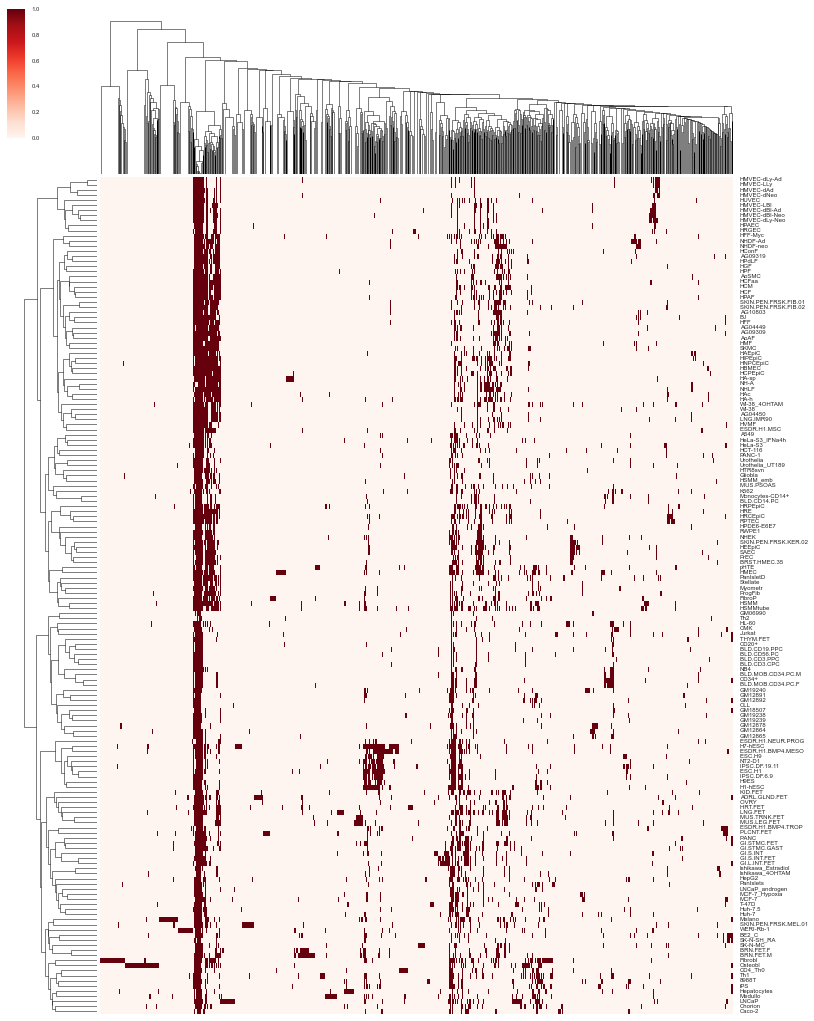

In [40]:
t0 = time.time()

seq_samples = random.sample(xrange(X.shape[1]), 1000)

sns.set(font_scale=0.6)
plt.figure()
sns.clustermap(df.iloc[seq_samples].T, metric='jaccard', cmap='Reds', linewidths=0, xticklabels=False, figsize=(13,18))
plt.savefig('clustermap.pdf')

print 'Takes %ds' % (time.time() - t0)